In [1]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
matplotlib.style.use('ggplot')

np.random.seed(34)


In [2]:
#create columns of various distributions
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})


In [3]:
df.head()

,beta,exponential,normal_p,normal_l
0,39.273740,2.263890,11.860245,4.748207
1,55.030395,13.108592,11.796582,10.959172
2,47.434682,3.312019,11.146945,3.919227
3,43.173536,17.664301,8.266689,42.072915
4,45.681443,2.109760,5.112983,16.960664


In [5]:
# make bimodal distribution
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

# create list of column names to use later
col_names = list(df.columns)

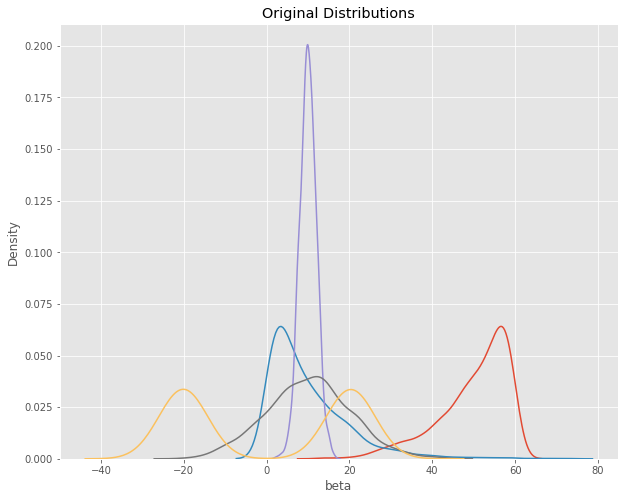

In [6]:
# plot original distribution plot
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Original Distributions')

sns.kdeplot(df['beta'], ax=ax1)
sns.kdeplot(df['exponential'], ax=ax1)
sns.kdeplot(df['normal_p'], ax=ax1)
sns.kdeplot(df['normal_l'], ax=ax1)
sns.kdeplot(df['bimodal'], ax=ax1);


In [8]:
df.mean()

beta           50.024249
exponential    10.028387
normal_p        9.994006
normal_l       10.175745
bimodal         0.077617
dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   beta         1000 non-null   float64
 1   exponential  1000 non-null   float64
 2   normal_p     1000 non-null   float64
 3   normal_l     1000 non-null   float64
 4   bimodal      1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB


In [10]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745,0.077617
std,8.474545,9.733928,2.013971,10.104004,20.436751
min,13.854022,0.007617,2.356844,-19.539980,-28.414530
25%,45.793283,2.951421,8.687478,3.566822,-20.172736
50%,52.337504,7.018565,9.983498,10.326331,-0.016522
75%,56.722191,14.022485,11.306914,16.615057,20.268411
max,59.990640,71.344341,16.214364,42.072915,32.203237


<AxesSubplot:>

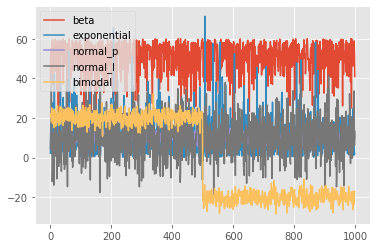

In [11]:
df.plot()

# Add a feature with much larger values

In [12]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big

In [13]:
col_names.append('normal_big')

<AxesSubplot:ylabel='Density'>

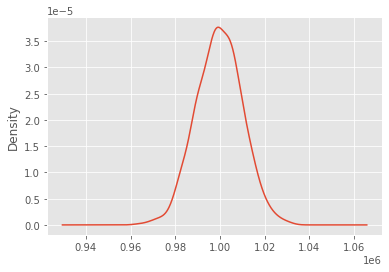

In [14]:
df['normal_big'].plot(kind='kde')

In [15]:
df.normal_big.mean()


999659.7534377404

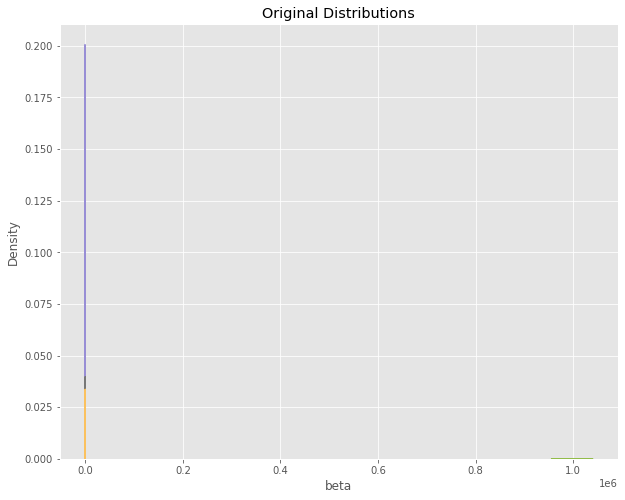

In [16]:
# plot original distribution plot with larger value feature
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Original Distributions')

sns.kdeplot(df['beta'], ax=ax1)
sns.kdeplot(df['exponential'], ax=ax1)
sns.kdeplot(df['normal_p'], ax=ax1)
sns.kdeplot(df['normal_l'], ax=ax1)
sns.kdeplot(df['bimodal'], ax=ax1);
sns.kdeplot(df['normal_big'], ax=ax1);



<AxesSubplot:>

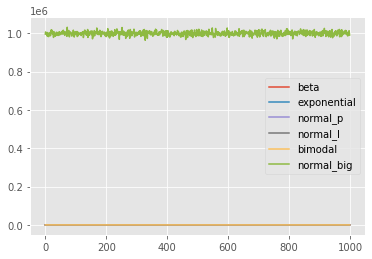

In [17]:
df.plot()

In [18]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,50.024249,10.028387,9.994006,10.175745,0.077617,9.996598e+05
std,8.474545,9.733928,2.013971,10.104004,20.436751,1.028118e+04
min,13.854022,0.007617,2.356844,-19.539980,-28.414530,9.635395e+05
25%,45.793283,2.951421,8.687478,3.566822,-20.172736,9.923944e+05
50%,52.337504,7.018565,9.983498,10.326331,-0.016522,9.994385e+05
75%,56.722191,14.022485,11.306914,16.615057,20.268411,1.006441e+06
max,59.990640,71.344341,16.214364,42.072915,32.203237,1.031618e+06


# MinMaxScaler

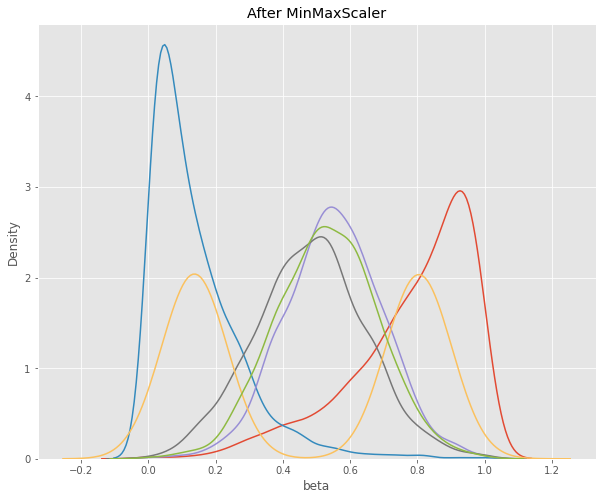

In [19]:
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(df)

df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)
sns.kdeplot(df_mm['bimodal'], ax=ax1)
sns.kdeplot(df_mm['normal_big'], ax=ax1);

In [20]:
df_mm['beta'].min()


0.0

In [21]:
df_mm['beta'].max()


1.0

In [22]:
mins = [df[col].min() for col in df.columns]
mins


[13.854021608409585,
 0.007616647999640711,
 2.356844136010337,
 -19.539980266046484,
 -28.41452975771466,
 963539.4501385051]

In [23]:
mixs = [df[col].max() for col in df.columns]
mixs


[59.99064035594787,
 71.3443406149087,
 16.214363985744633,
 42.07291533170829,
 32.20323680430535,
 1031618.3975679104]

# Let's check the minimums and maximums for each column after MinMaxScaler.

In [24]:
mins = [df_mm[col].min() for col in df_mm.columns]
mins

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [25]:
mixs = [df_mm[col].max() for col in df_mm.columns]
mixs

[1.0, 1.0, 1.0000000000000002, 0.9999999999999999, 1.0, 0.9999999999999982]

# RobustScaler

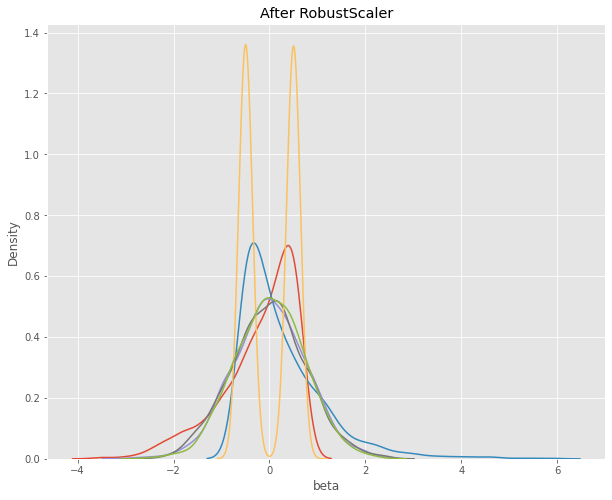

In [26]:
r_scaler = preprocessing.RobustScaler()
df_r = r_scaler.fit_transform(df)

df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)
sns.kdeplot(df_r['bimodal'], ax=ax1)
sns.kdeplot(df_r['normal_big'], ax=ax1);

In [27]:
mins = [df_r[col].min() for col in df_r.columns]
mins


[-3.521256013025104,
 -0.6332678488395711,
 -2.91156392760608,
 -2.2889157521406003,
 -0.7022058003576258,
 -2.555664391175706]

In [28]:
mixs = [df_r[col].max() for col in df_r.columns]
mixs


[0.700265390227522,
 5.810261462820452,
 2.3787055278781155,
 2.433017414912012,
 0.7967073272148806,
 2.2908984000589876]

# StandardScaler

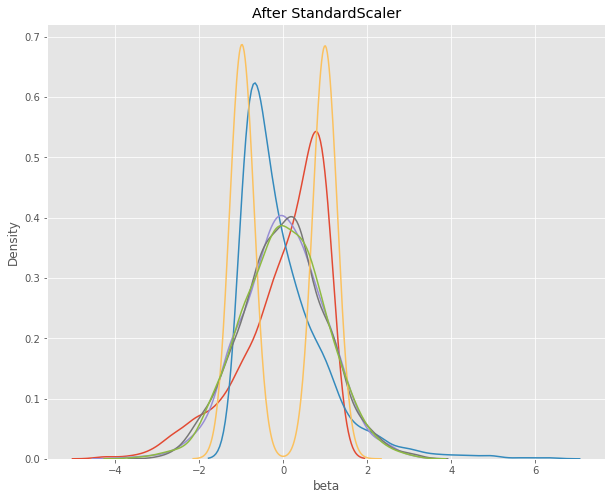

In [29]:


s_scaler = preprocessing.StandardScaler()
df_s = s_scaler.fit_transform(df)

df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)
sns.kdeplot(df_s['bimodal'], ax=ax1)
sns.kdeplot(df_s['normal_big'], ax=ax1);



In [30]:
mins = [df_s[col].min() for col in df_s.columns]
mins

[-4.270238356986723,
 -1.0299834064894655,
 -3.7939883106225425,
 -2.9424568517799368,
 -1.394859833489455,
 -3.5150038125243257]

In [31]:
maxs = [df_s[col].max() for col in df_s.columns]
maxs


[1.1766269856411702,
 6.302351061844018,
 3.0901485502210164,
 3.158463886242835,
 1.5727399436726046,
 3.1100169627599428]

# Normalizer


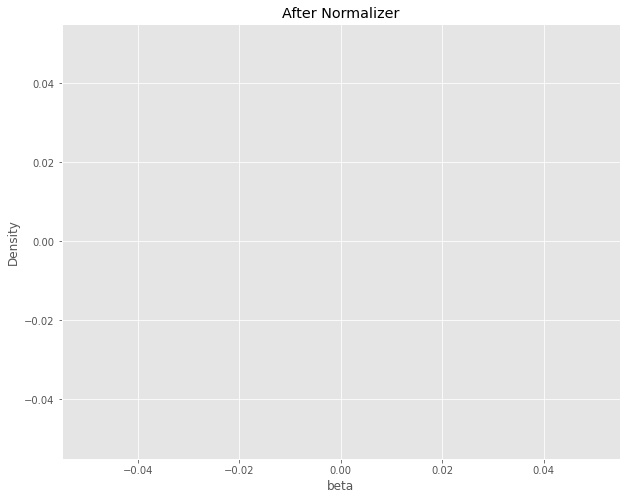

In [33]:
n_scaler = preprocessing.Normalizer()
df_n = n_scaler.fit_transform(df)

df_n = pd.DataFrame(df_n, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After Normalizer')

sns.kdeplot(df_n['beta'], ax=ax1)
sns.kdeplot(df_n['exponential'], ax=ax1)
sns.kdeplot(df_n['normal_p'], ax=ax1)
sns.kdeplot(df_n['normal_l'], ax=ax1)
sns.kdeplot(df_n['bimodal'], ax=ax1)
sns.kdeplot(df_n['normal_big'], ax=ax1);

In [34]:
mins = [df_n[col].min() for col in df_n.columns]
mins

[1.4079374632297539e-05,
 7.522139843064789e-09,
 2.3234529329742325e-06,
 -1.9579616261772786e-05,
 -2.8816416627250464e-05,
 0.9999999956229314]

In [35]:
mixs = [df_n[col].max() for col in df_n.columns]
mixs

[6.100678905615154e-05,
 7.14767318331286e-05,
 1.6040421587345057e-05,
 4.216467099322939e-05,
 3.203188047170031e-05,
 0.9999999994877503]

# Combined Plot

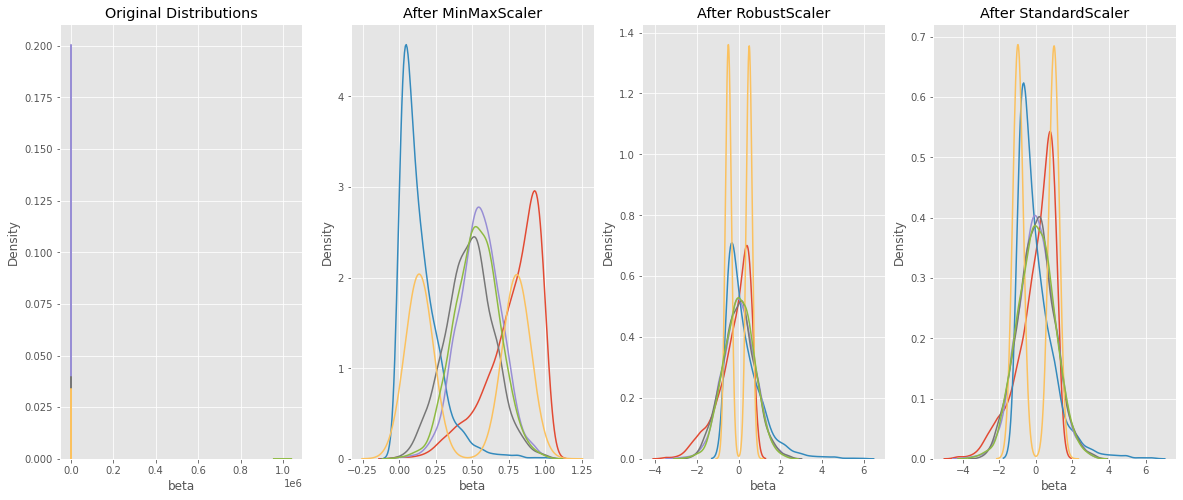

In [36]:
# Combined plot.

fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(20, 8))


ax0.set_title('Original Distributions')

sns.kdeplot(df['beta'], ax=ax0)
sns.kdeplot(df['exponential'], ax=ax0)
sns.kdeplot(df['normal_p'], ax=ax0)
sns.kdeplot(df['normal_l'], ax=ax0)
sns.kdeplot(df['bimodal'], ax=ax0)
sns.kdeplot(df['normal_big'], ax=ax0);


ax1.set_title('After MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)
sns.kdeplot(df_mm['bimodal'], ax=ax1)
sns.kdeplot(df_mm['normal_big'], ax=ax1);


ax2.set_title('After RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax2)
sns.kdeplot(df_r['exponential'], ax=ax2)
sns.kdeplot(df_r['normal_p'], ax=ax2)
sns.kdeplot(df_r['normal_l'], ax=ax2)
sns.kdeplot(df_r['bimodal'], ax=ax2)
sns.kdeplot(df_r['normal_big'], ax=ax2);


ax3.set_title('After StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax3)
sns.kdeplot(df_s['exponential'], ax=ax3)
sns.kdeplot(df_s['normal_p'], ax=ax3)
sns.kdeplot(df_s['normal_l'], ax=ax3)
sns.kdeplot(df_s['bimodal'], ax=ax3)
sns.kdeplot(df_s['normal_big'], ax=ax3);